<a href="https://colab.research.google.com/github/hdhd7/MalashinLabs/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

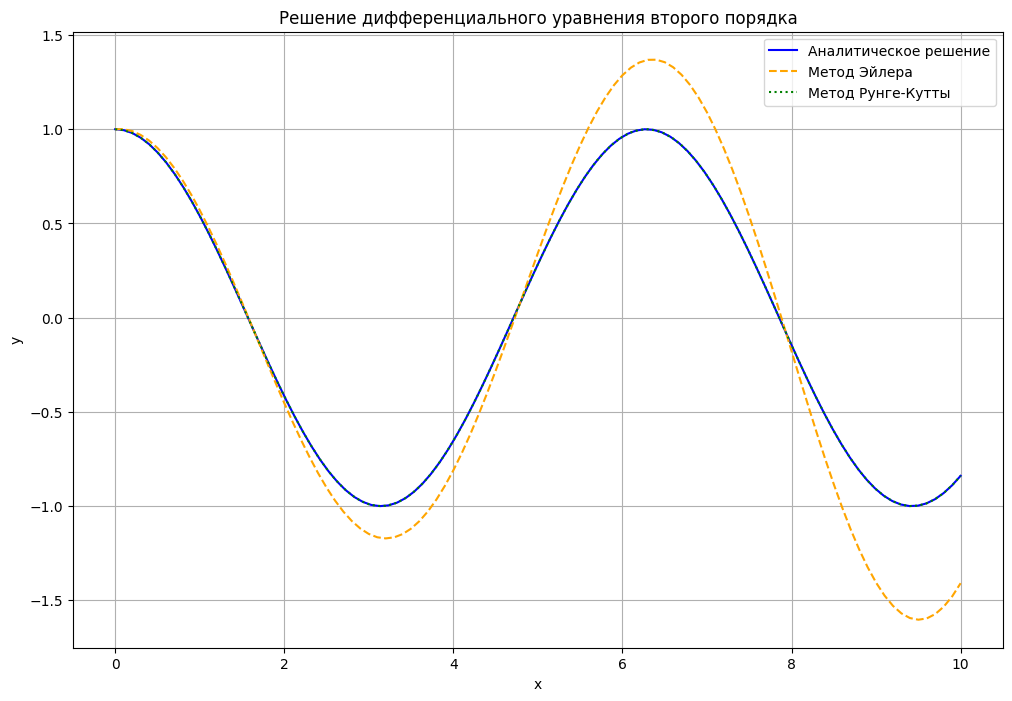

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Константа
k = 1.0
A = 1.0  # начальная амплитуда
B = 0.0  # начальная скорость

# Параметры
x_start = 0
x_end = 10
num_points = 100
h = (x_end - x_start) / num_points  # шаг

# 1. Аналитическое решение
def analytical_solution(x):
    return A * np.cos(np.sqrt(k) * x) + B * np.sin(np.sqrt(k) * x)

# 2. Метод Эйлера
def euler_method(x_start, x_end, h):
    num_points = int((x_end - x_start) / h) + 1
    x_values = np.linspace(x_start, x_end, num_points)
    y_values = np.zeros(num_points)
    v_values = np.zeros(num_points)

    y_values[0] = A
    v_values[0] = B

    for i in range(1, num_points):
        y_values[i] = y_values[i - 1] + h * v_values[i - 1]
        v_values[i] = v_values[i - 1] - h * k * y_values[i - 1]

    return x_values, y_values

# 3. Метод Рунге-Кутты 4-го порядка
def runge_kutta_method(x_start, x_end, h):
    num_points = int((x_end - x_start) / h) + 1
    x_values = np.linspace(x_start, x_end, num_points)
    y_values = np.zeros(num_points)
    v_values = np.zeros(num_points)

    y_values[0] = A
    v_values[0] = B

    for i in range(1, num_points):
        k1_y = v_values[i - 1]
        k1_v = -k * y_values[i - 1]

        k2_y = v_values[i - 1] + 0.5 * h * k1_v
        k2_v = -k * (y_values[i - 1] + 0.5 * h * k1_y)

        k3_y = v_values[i - 1] + 0.5 * h * k2_v
        k3_v = -k * (y_values[i - 1] + 0.5 * h * k2_y)

        k4_y = v_values[i - 1] + h * k3_v
        k4_v = -k * (y_values[i - 1] + h * k3_y)

        y_values[i] = y_values[i - 1] + (h / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
        v_values[i] = v_values[i - 1] + (h / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return x_values, y_values

# Получаем значения
x_analytical = np.linspace(x_start, x_end, num_points)
y_analytical = analytical_solution(x_analytical)

x_euler, y_euler = euler_method(x_start, x_end, h)
x_rk, y_rk = runge_kutta_method(x_start, x_end, h)

# Визуализация результатов
plt.figure(figsize=(12, 8))
plt.plot(x_analytical, y_analytical, label='Аналитическое решение', color='blue')
plt.plot(x_euler, y_euler, label='Метод Эйлера', linestyle='--', color='orange')
plt.plot(x_rk, y_rk, label='Метод Рунге-Кутты', linestyle=':', color='green')
plt.title('Решение дифференциального уравнения второго порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
